In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import mplcyberpunk
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from typing import List, Dict, Callable

plt.style.use('ggplot')
# plt.style.use("cyberpunk")

import os
os.getcwd()

'/home/jovyan/work/Fraud_Detection'

In [3]:
# Import Custom Modules
from src.cleaner import *

In [4]:
# Import Data
data = pd.read_json('data/data.json')

In [5]:
# Copy data to avoid collisions
df = clean_with_target(data.copy())

# One Hot Encoding
df = ohe_existence(df, ['email_domain', 'payee_name'])
# df.drop(columns=['venue_latitude', 'venue_longitude'], inplace=True)
df.dropna(inplace=True)

In [6]:
df

,channels,country,currency,delivery_method,fb_published,has_logo,listed,payout_type,user_created,user_type,venue_country,venue_latitude,venue_longitude,fraud,n_previous_payouts,event_duration,event_till_publish,user_event_lifespan,has_email_domain,has_payee_name
0,5,840,840,0.0,0,0,1,3,1259613950,1,840,25.777471,-80.133433,1,0,36000,370132.0,3125756,1,0
1,0,840,840,1.0,0,1,0,2,1280942776,3,840,32.776566,-79.930922,0,49,32400,625.0,12889894,1,1
2,8,840,840,1.0,0,0,1,2,1272559388,3,840,33.944201,-118.080419,0,36,27000,952.0,18531568,1,1
4,11,840,840,0.0,1,0,1,2,1288984065,3,840,42.353848,-71.044276,0,49,28800,300.0,3010601,1,1
5,6,840,840,0.0,0,1,1,2,1268579110,1,840,38.209797,-84.558831,0,5,10800,62.0,25842700,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,0,840,840,0.0,0,1,0,3,1360297993,1,840,39.373780,-76.629921,1,0,25200,759.0,0,1,0
14333,5,840,840,1.0,0,0,1,2,1241625346,4,840,32.778906,-117.209791,0,5,10800,3205.0,118741696,1,1
14334,13,-1,840,0.0,1,1,1,1,1353386971,4,840,30.041819,-89.957130,0,1,21600,736511.0,7213359,1,0
14335,8,840,840,0.0,0,1,1,1,1290204991,3,840,40.862283,-73.911363,0,128,39600,268.0,70171294,1,0


In [7]:
from sklearn.model_selection import train_test_split

# Create X, y targets
y = df.pop('fraud')
X = df
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

# # Adding the second hidden layer
# classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [9]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 20, epochs = 15)

Epoch 1/15
6614/6614 [==============================] - 1s 135us/step - loss: 33371.5402 - accuracy: 0.8754
Epoch 2/15
6614/6614 [==============================] - 1s 88us/step - loss: 5232.3476 - accuracy: 0.8765
Epoch 3/15
6614/6614 [==============================] - 1s 86us/step - loss: 4061.1797 - accuracy: 0.8810
Epoch 4/15
6614/6614 [==============================] - 1s 90us/step - loss: 4338.1998 - accuracy: 0.8777
Epoch 5/15
6614/6614 [==============================] - 0s 74us/step - loss: 3161.7122 - accuracy: 0.8756
Epoch 6/15
6614/6614 [==============================] - 1s 77us/step - loss: 2485.4608 - accuracy: 0.8807
Epoch 7/15
6614/6614 [==============================] - 1s 89us/step - loss: 1907.2818 - accuracy: 0.8821
Epoch 8/15
6614/6614 [==============================] - 0s 75us/step - loss: 2244.1488 - accuracy: 0.8796
Epoch 9/15
6614/6614 [==============================] - 0s 75us/step - loss: 1156.7232 - accuracy: 0.8793
Epoch 10/15
6614/6614 [=====================

# Prediction

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

6615/6615 [==============================] - 0s 49us/step


[40.146473636180275, 0.9357520937919617]

# Report

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=False))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6190
           1       0.00      0.00      0.00       425

    accuracy                           0.94      6615
   macro avg       0.47      0.50      0.48      6615
weighted avg       0.88      0.94      0.90      6615



# Confusion Matrix

Test Data Accuracy: 0.9358


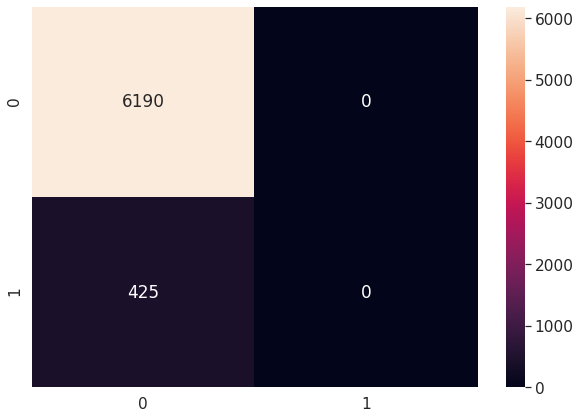

In [12]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))